In [1]:
%matplotlib inline

In [2]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
# File path
city_data_to_load = "Resources/city_data.csv"
city_ride_to_load = "Resources/ride_data.csv"

# read the file
city_data_df = pd.read_csv(city_data_to_load)
city_ride_df = pd.read_csv(city_ride_to_load)


# check the print out
city_data_df
#city_ride_df


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
# check the null value

city_data_df.isnull().sum()
city_ride_df.isnull().sum()


city       0
date       0
fare       0
ride_id    0
dtype: int64

In [5]:
# Check the na value

city_data_df.isna().sum()
city_ride_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# check total count
city_data_df.count()
city_ride_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
# check the data type
city_data_df.dtypes
city_ride_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]== 'Urban')


66

In [10]:
sum(city_data_df["type"] == 'Suburban')

36

In [11]:
sum(city_data_df["type"] == 'Rural')

18

In [12]:
# merge the two data frames

pyber_data_df = pd.merge(city_ride_df, city_data_df, how="left", on= ["city","city"])

# display the merge data frome

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# create dataframe by type of city

urban_cities_df = pyber_data_df[pyber_data_df["type"]=='Urban']
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [14]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Suburban']
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [15]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# city count

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [17]:

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [18]:

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [19]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [20]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [21]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [22]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [23]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [24]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

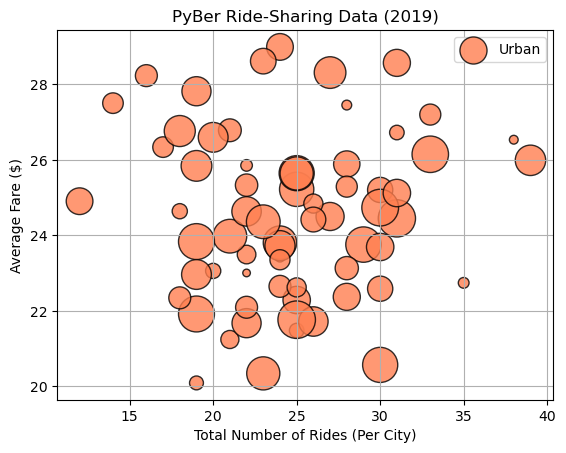

In [25]:
plt.scatter(urban_ride_count,urban_avg_fare, 
            s=10*urban_driver_count, color='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
 
plt.legend()

plt.show()

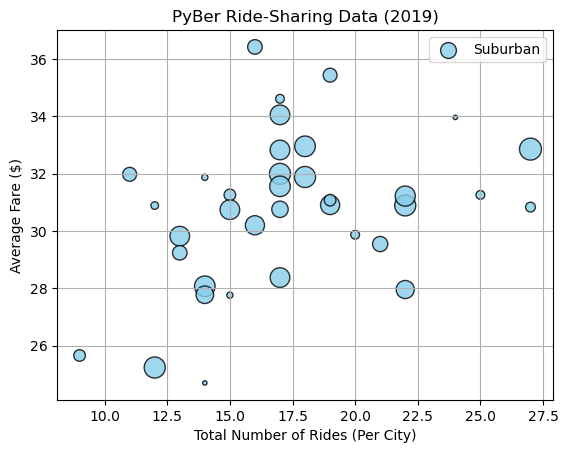

In [26]:
plt.scatter(suburban_ride_count,suburban_avg_fare, 
            s=10*suburban_driver_count, color='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
 
plt.legend()

plt.show()

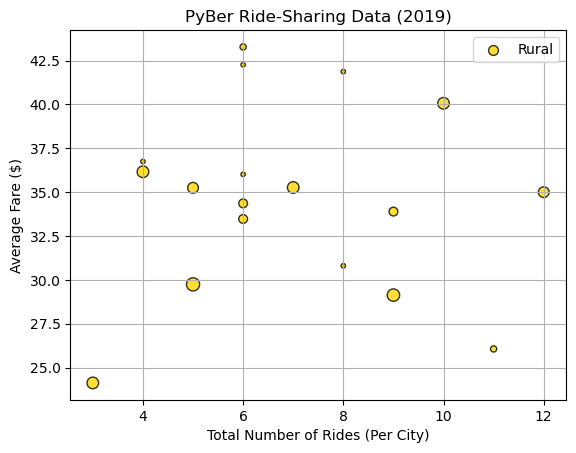

In [27]:
plt.scatter(rural_ride_count,rural_avg_fare, 
            s=10*rural_driver_count, color='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
 
plt.legend()

plt.show()

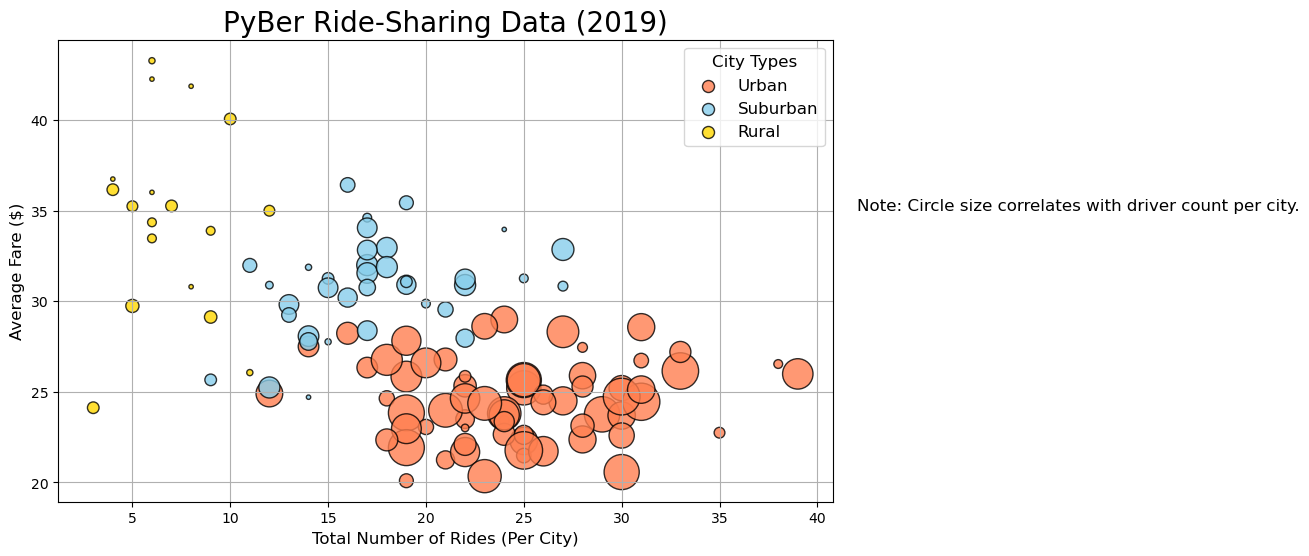

In [28]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare, 
            s=10*urban_driver_count, color='coral',
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare, 
            s=10*suburban_driver_count, color='skyblue',
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,rural_avg_fare, 
            s=10*rural_driver_count, color='gold',
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize= 12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)
 
#plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# incorporate a text label about circle size

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# save the png picture

plt.savefig("analysis/Pyber_ride-sharing_data_2019.png")
plt.show()


In [29]:
# summary statistics

urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
# summary statistics

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
# summary statistics 

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# summary statistics for ride count

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
# summary statistics for ride count

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
# summary statistics for ride count

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# calculate the mean of ride count for all three type of cities

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# calculate the median of ride count for all three type of cities

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# calculate the mode of ride count for all three type of cities

round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [38]:
# import numpy and scipy
import numpy as np
import scipy.stats as sts


In [39]:
# calculate centeral tendency of ride count for the cities

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride count for Urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride count for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride count for Urban trips is {mode_urban_ride_count}.")


The mean for the ride count for Urban trips is 24.62.
The median for the ride count for urban trips is 24.0.
The mode for the ride count for Urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for SubUrban trips is {mode_suburban_ride_count}.")

The mode for the ride count for SubUrban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [41]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}.")

The mode for the ride count for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [42]:
# get the fare data from each dataframe

urban_fare=urban_cities_df["fare"]
urban_fare
                        

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [43]:
# calculate the center tendency

mean_urban_fare=np.mean(urban_fare)
print(f"The mean fare price for urban trips is ${mean_urban_fare:.2f}.")

median_urban_fare=np.median(urban_fare)
print(f"The median fare price for urban trips is ${median_urban_fare:.2f}.")

mode_urban_fare=sts.mode(urban_fare)
print(f"The mode fare price for urban trips is {mode_urban_fare}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# get the fare data from each dataframe

suburban_fare=suburban_cities_df["fare"]
suburban_fare




1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64

In [45]:
# calculate the center tendency

mean_suburban_fare=np.mean(suburban_fare)
print(f"The mean fare price for suburban trips is ${mean_suburban_fare:.2f}.")

median_suburban_fare=np.median(suburban_fare)
print(f"The median fare price for suburban trips is ${median_suburban_fare:.2f}.")

mode_suburban_fare=sts.mode(suburban_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fare}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [46]:
# get the fare data from each dataframe

rural_fare=rural_cities_df["fare"]
rural_fare


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [47]:
# calculate the center tendency

mean_rural_fare=np.mean(rural_fare)
print(f"The mean fare price for rural trips is ${mean_rural_fare:.2f}.")

median_rural_fare=np.median(rural_fare)
print(f"The median fare price for rural trips is ${median_rural_fare:.2f}.")

mode_rural_fare=sts.mode(rural_fare)
print(f"The mode fare price for rural trips is {mode_rural_fare}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [48]:
# calculate the cities drivers

urban_drivers = urban_cities_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [49]:
# calculate the center tendency

mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for urban drivers count is {mean_urban_drivers:.0f}.")

median_urban_drivers=np.median(urban_drivers)
print(f"The median for urban drivers count is {median_urban_drivers:.0f}.")

mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode for urban drivers count is {mode_urban_drivers}.")

The mean for urban drivers count is 37.
The median for urban drivers count is 37.
The mode for urban drivers count is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [50]:
# calculate the cities drivers

suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers

1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64

In [51]:
# calculate the center tendency

mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for suburban drivers count is {mean_suburban_drivers:.0f}.")

median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for suburban drivers count is {median_suburban_drivers:.0f}.")

mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for suburban drivers count is {mode_suburban_drivers}.")

The mean for suburban drivers count is 14.
The median for suburban drivers count is 16.
The mode for suburban drivers count is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [52]:
# calculate the cities drivers

rural_drivers = rural_cities_df["driver_count"]
rural_drivers

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

In [53]:
# calculate the center tendency

mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for rural drivers count is {mean_rural_drivers:.0f}.")

median_rural_drivers=np.median(rural_drivers)
print(f"The median for rural drivers count is {median_rural_drivers:.0f}.")

mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for rural drivers count is {mode_rural_drivers}.")

The mean for rural drivers count is 4.
The median for rural drivers count is 4.
The mode for rural drivers count is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [54]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

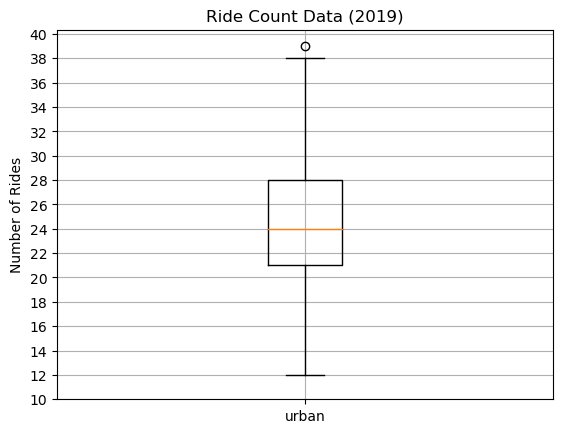

In [56]:
# create box-and-whisker plot for urban cities ride count

x_labels = ["urban"]

fig, ax=plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [57]:
# get summary statistics for urban ride count
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

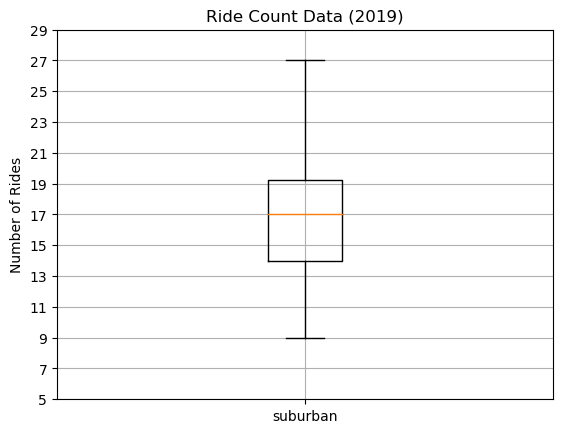

In [62]:
# create box-and-whisker plot for suburban cities ride count

x_labels = ["suburban"]

fig, ax=plt.subplots()

ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 31, step=2.0))
ax.grid()
plt.show()

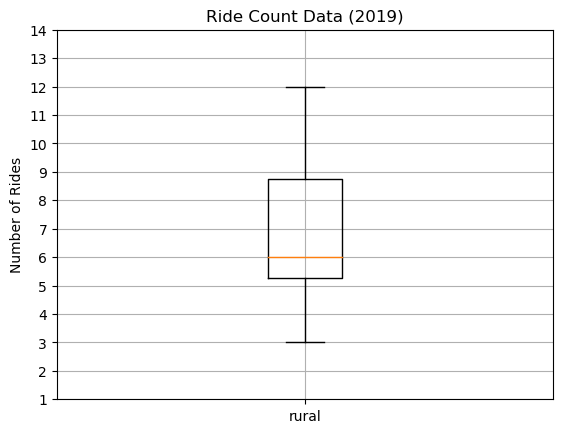

In [60]:
# create box-and-whisker plot for rual cities ride count

x_labels = ["rural"]

fig, ax=plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 15, step=1.0))
ax.grid()
plt.show()

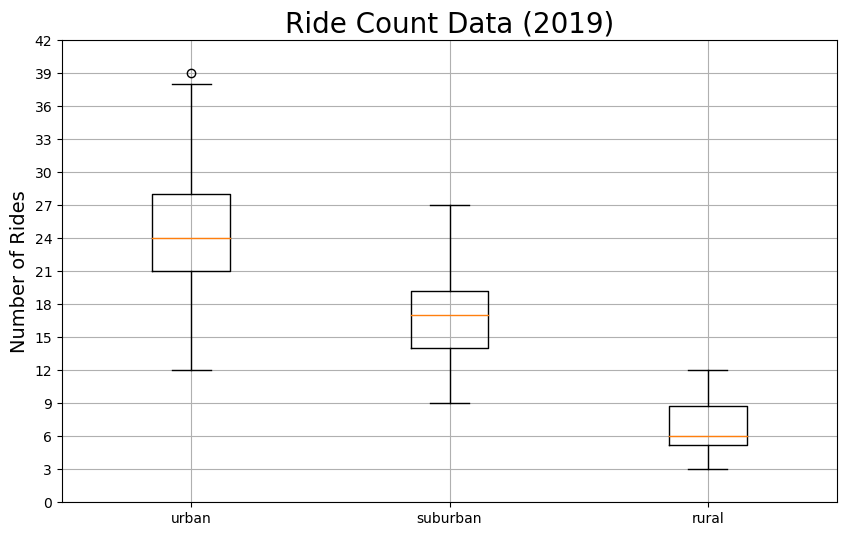

In [63]:
# add all cities ride count data in one box-and-whisker plot

# create box-and-whisker plot for all cities ride count

x_labels = ["urban","suburban","rural"]

ride_count_data =[urban_ride_count,suburban_ride_count,rural_ride_count]

fig, ax=plt.subplots(figsize=(10,6))

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()
# save file

plt.savefig("analysis/box-and-whisker-all-cities.png")

plt.show()

In [67]:
# find the outlier in urban ride count

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


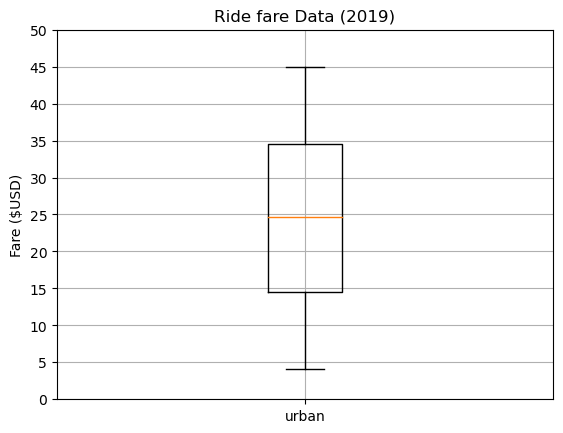

summary statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [69]:
# create the box-and-whisker plot for fare

x_labels=["urban"]

fig, ax=plt.subplots()

ax.boxplot(urban_fare, labels=x_labels)

ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride fare Data (2019)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()

plt.show()

print("summary statistics")

urban_fare.describe()


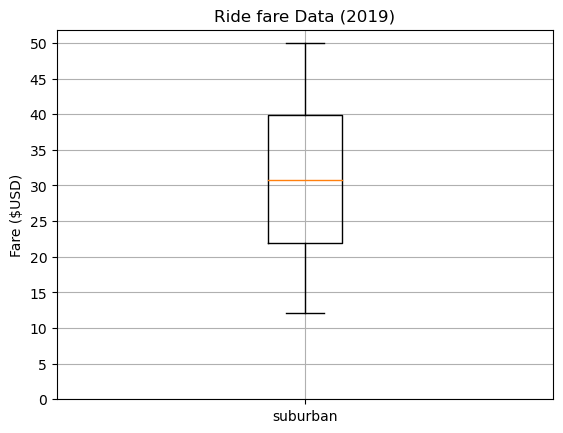

summary statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [70]:
# create the box-and-whisker plot for fare

x_labels=["suburban"]

fig, ax=plt.subplots()

ax.boxplot(suburban_fare, labels=x_labels)

ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride fare Data (2019)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()

plt.show()

print("summary statistics")

suburban_fare.describe()


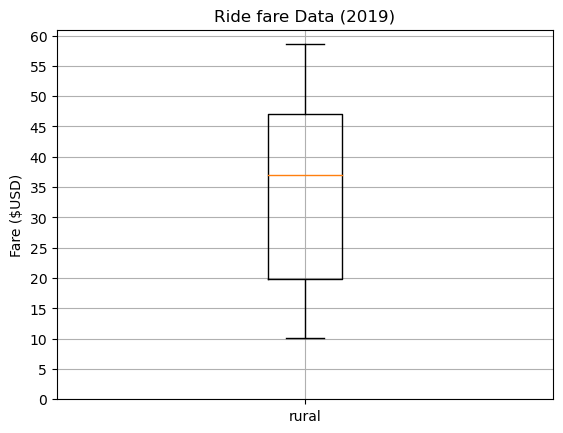

summary statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [73]:
# create the box-and-whisker plot for fare

x_labels=["rural"]

fig, ax=plt.subplots()

ax.boxplot(rural_fare, labels=x_labels)

ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride fare Data (2019)')
ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()

plt.show()

print("summary statistics")

rural_fare.describe()


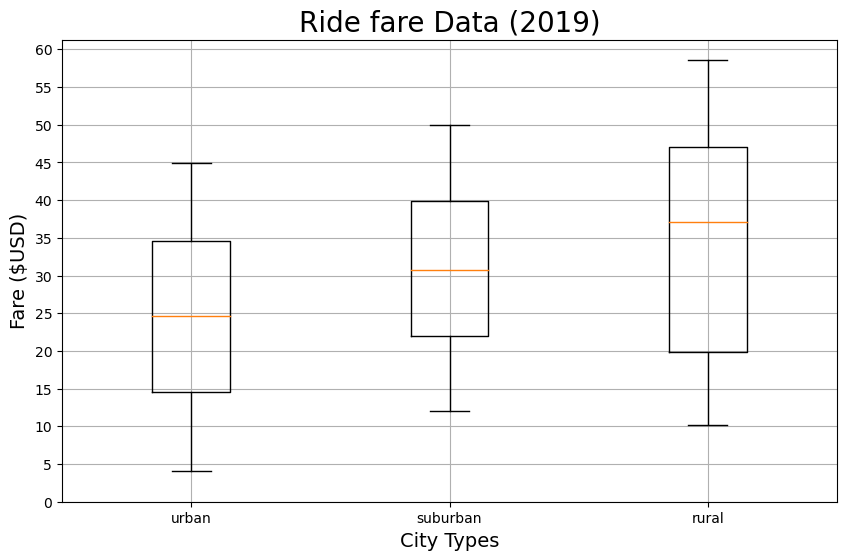

summary statistics


(count    1625.000000
 mean       24.525772
 std        11.738649
 min         4.050000
 25%        14.550000
 50%        24.640000
 75%        34.580000
 max        44.970000
 Name: fare, dtype: float64,
 count    625.000000
 mean      30.970128
 std       10.677508
 min       12.050000
 25%       21.970000
 50%       30.750000
 75%       39.830000
 max       49.960000
 Name: fare, dtype: float64,
 count    125.000000
 mean      34.623440
 std       14.558046
 min       10.110000
 25%       19.900000
 50%       37.050000
 75%       47.070000
 max       58.550000
 Name: fare, dtype: float64)

In [76]:
# create the box-and-whisker plot for fare

x_labels=["urban","suburban","rural"]

ride_fare_data =[urban_fare,suburban_fare,rural_fare]

fig, ax=plt.subplots(figsize=(10,6))



ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_title('Ride fare Data (2019)', fontsize=20)

ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()

plt.savefig("analysis/box-and-whisker-plot-all-fare.png")

plt.show()

print("summary statistics")

(urban_fare.describe(),suburban_fare.describe(),rural_fare.describe())


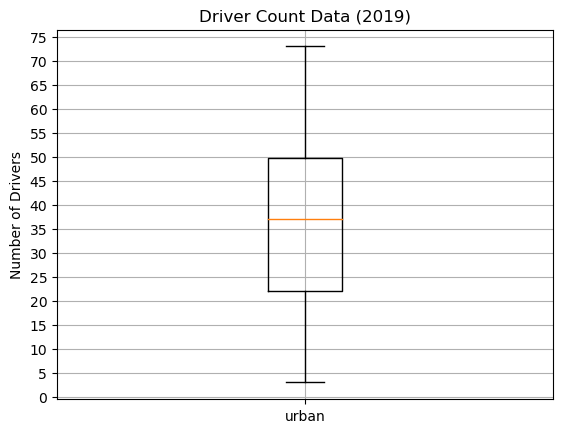

summary statistics


count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

In [81]:
# create a box-and-whisker for driver count data

x_labels=["urban"]

fig, ax=plt.subplots()

ax.boxplot(urban_driver_count, labels=x_labels)

ax.set_ylabel('Number of Drivers')
ax.set_title('Driver Count Data (2019)')
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()

plt.show()

print("summary statistics")

urban_driver_count.describe()

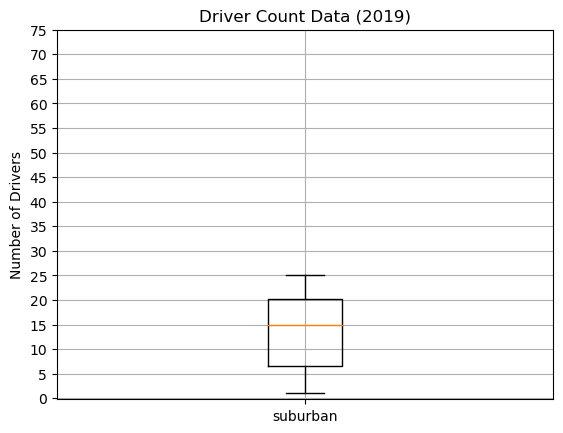

summary statistics


count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [83]:
# create a box-and-whisker for driver count data

x_labels=["suburban"]

fig, ax=plt.subplots()

ax.boxplot(suburban_driver_count, labels=x_labels)

ax.set_ylabel('Number of Drivers')
ax.set_title('Driver Count Data (2019)')
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()

plt.show()

print("summary statistics")

suburban_driver_count.describe()

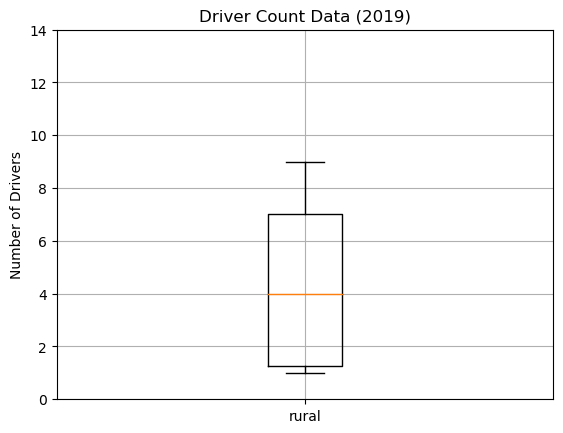

summary statistics


count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [85]:
# create a box-and-whisker for driver count data

x_labels=["rural"]

fig, ax=plt.subplots()

ax.boxplot(rural_driver_count, labels=x_labels)

ax.set_ylabel('Number of Drivers')
ax.set_title('Driver Count Data (2019)')
ax.set_yticks(np.arange(0,15,step=2.0))
ax.grid()

plt.show()

print("summary statistics")

rural_driver_count.describe()

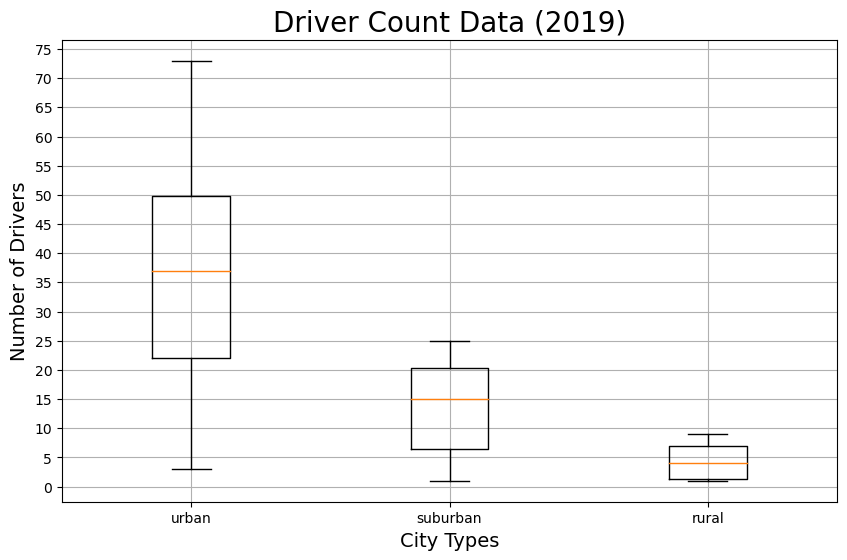

summary statistics


(count    66.000000
 mean     36.439394
 std      19.827819
 min       3.000000
 25%      22.000000
 50%      37.000000
 75%      49.750000
 max      73.000000
 Name: driver_count, dtype: float64,
 count    36.000000
 mean     13.611111
 std       8.022389
 min       1.000000
 25%       6.500000
 50%      15.000000
 75%      20.250000
 max      25.000000
 Name: driver_count, dtype: float64,
 count    18.000000
 mean      4.333333
 std       2.828427
 min       1.000000
 25%       1.250000
 50%       4.000000
 75%       7.000000
 max       9.000000
 Name: driver_count, dtype: float64)

In [87]:
# create the box-and-whisker plot for fare

x_labels=["urban","suburban","rural"]

ride_driver_data =[urban_driver_count,suburban_driver_count,rural_driver_count]

fig, ax=plt.subplots(figsize=(10,6))



ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_title('Driver Count Data (2019)', fontsize=20)


ax.boxplot(ride_driver_data, labels=x_labels)

ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()

plt.savefig("analysis/box-and-whisker-plot-all-driver.png")

plt.show()

print("summary statistics")

(urban_driver_count.describe(),suburban_driver_count.describe(),rural_driver_count.describe())


In [88]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [90]:
# get the sum of fare by city type

sum_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [91]:
# get total fare

total_fare=pyber_data_df.sum()["fare"]
total_fare

63538.64

In [92]:
# calculate percentage of fare by city type

type_percentage = 100 * pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.sum()["fare"]
type_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

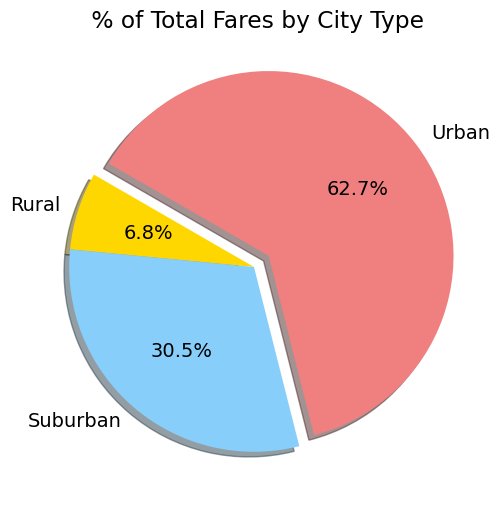

In [111]:
# import matplotlib mpl to change default fontsize

import matplotlib as mpl

# build the percentage of fares by city type for pie chart

plt.subplots(figsize=(10,6))

plt.pie(type_percentage, 
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%',
        shadow=True, startangle=150)

plt.title(" % of Total Fares by City Type")

# change default fond size 

mpl.rcParams['font.size'] = 14

# save picture

plt.savefig("analysis/Pyber_pie_chart_fare.png")

# show chart
plt.show()

In [112]:
# calculate total ride by type

sum_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [113]:
# get total rides

total_ride=pyber_data_df.count()["ride_id"]
total_ride

2375

In [114]:
# calculate percentage of ride by city type

ride_percentage = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df.count()["ride_id"]
ride_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

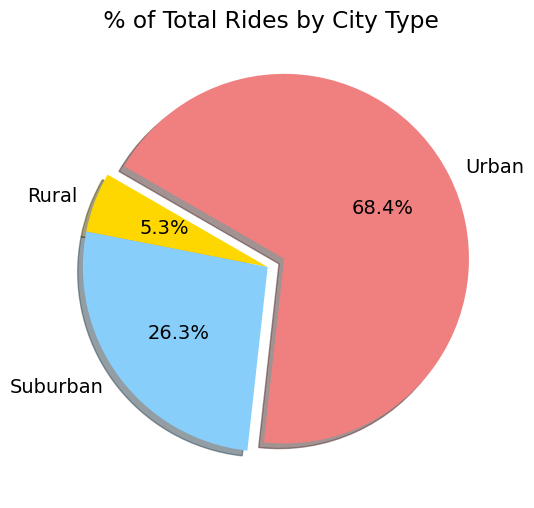

In [115]:
# build the percentage of fares by city type for pie chart

plt.subplots(figsize=(10,6))

plt.pie(ride_percentage, 
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%',
        shadow=True, startangle=150)

plt.title(" % of Total Rides by City Type")

# change default fond size 

mpl.rcParams['font.size'] = 14

# save picture

plt.savefig("analysis/Pyber_pie_chart_ride.png")

# show chart
plt.show()

In [117]:
# get the sum of drivers by city type

sum_driver_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_driver_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [118]:
# get total drivers

total_driver=pyber_data_df.sum()["driver_count"]
total_driver

68709

In [122]:
# calculate percentage of driver by city type

driver_percentage = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df.sum()["driver_count"]
driver_percentage

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

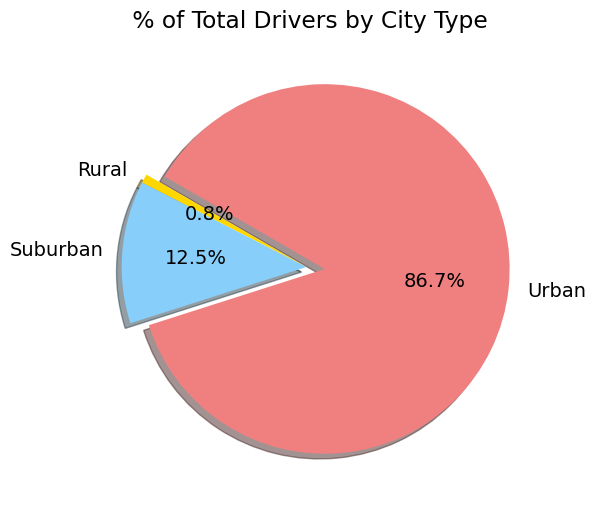

In [124]:
# build the percentage of drivers by city type for pie chart

plt.subplots(figsize=(10,6))

plt.pie(driver_percentage, 
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0, 0, 0.1], autopct='%1.1f%%',
        shadow=True, startangle=150)

plt.title(" % of Total Drivers by City Type")

# change default fond size 

mpl.rcParams['font.size'] = 14

# save picture

plt.savefig("analysis/Pyber_pie_chart_driver.png")

# show chart
plt.show()